# $k$-Means Clustering

In this notebook, I implement the $k$-Means Clustering based on the * **Shill Bidding Dataset** *.

I implement the algorithm with the notes defined in * **Lecture 10.1  k-Means Clustering.** *.

## Algorithm Inplement

---

Import the libraries and data set.

In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

We load the data set and preprocess the response varaible. 

In [2]:
# Import the data
df = pd.read_csv("../3. Data/Shill_Bidding_Dataset.csv")
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [3]:
X = df.drop(['Record_ID','Auction_ID','Bidder_ID','Class'],axis=1)
y = df.Class

Before apply the ```KMeans``` clustering on the data, we fit our standardized data using ```PCA```.

In [4]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Then we can check the variance proportion for each principle component.

In [5]:
pca.explained_variance_ratio_

array([8.68827199e-01, 5.55290455e-02, 3.20713662e-02, 2.39314535e-02,
       8.94876070e-03, 4.69025137e-03, 4.15660757e-03, 1.11029515e-03,
       7.35021328e-04])

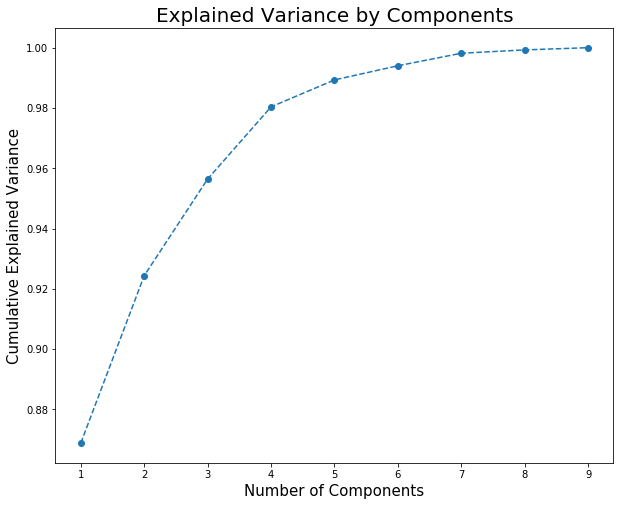

In [6]:
plt.figure(figsize=(10,8))
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.xlabel('Number of Components', size = 15)
plt.ylabel('Cumulative Explained Variance', size = 15)
plt.title('Explained Variance by Components', size = 20)
plt.show()

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 90 % of the variance. So, in this instance, we decide to keep the first 2 components.

In [7]:
pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)

The next step is to decide how many clustering solutions we'd test. To deal with this problem, we fit K-Means Clustering with different number of components and plot the model's inertia against the number of components on a graph. While the model's inertia is a performance metric, which is the mean squared distance between each instance and its closest centroid.

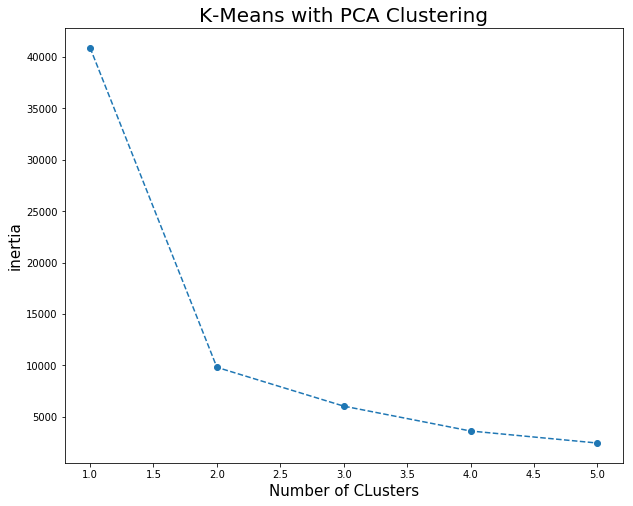

In [8]:
wcss = []
for i in range(1,6):
    kmeans_pca = KMeans(n_clusters=i, random_state=23)
    kmeans_pca.fit(pca_data)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1,6), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of CLusters', size = 15)
plt.ylabel('inertia', size = 15)
plt.title('K-Means with PCA Clustering', size = 20)
plt.show()

From this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the Inertia graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 2 clusters mark. So, we’ll be keeping a two-cluster solution.

In [9]:
kmeans_pca = KMeans(n_clusters=2, random_state=23)
kmeans_pca.fit(pca_data)
y_pred = kmeans_pca.labels_

Let’s visualize the segments with respect to the first two components, then compare it with the true two-componnent PCA plot.

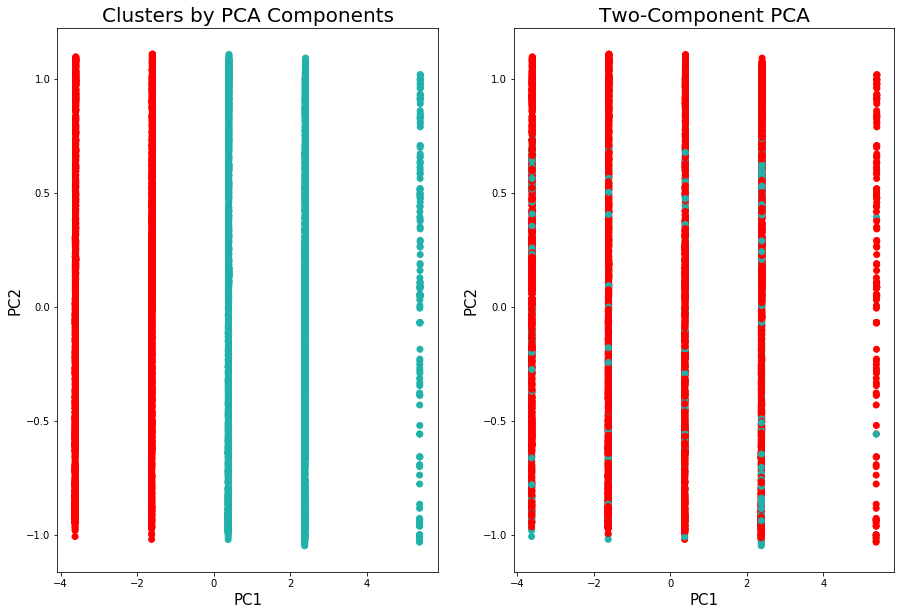

In [10]:
PC1 = pca_data[:,0]
PC2 = pca_data[:,1]

def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"

c = [colors(label) for label in y]
current_colors = [colors(label) for label in y_pred]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(PC1, PC2, c = current_colors)
ax1.set_title('Clusters by PCA Components', size = 20)
ax1.set_xlabel('PC1', size = 15)
ax1.set_ylabel('PC2', size = 15)

ax2.scatter(PC1, PC2, c = c)
ax2.set_title('Two-Component PCA', size = 20)
ax2.set_xlabel('PC1', size = 15)
ax2.set_ylabel('PC2', size = 15)
plt.show()

We can also check the accuracy for K-Means with PCA clustering.

In [11]:
sum(y == y_pred) / len(y_pred)

0.45151083689289667

The accuracy is bad.